## 생선 분류 문제

In [4]:
# fish.csv 파일을 데이터프레임으로 바꾸어 확인하기
import pandas as pd

In [5]:
df = pd.read_csv('data/Fish.csv')
df.head()
# df.shape: 159 행과 7열

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [6]:
# Species 종류 확인(행 값 확인)
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [7]:
# bream에 대한 데이터만 뽑아 새로운 변수로 저장
bream_df = df[df['Species'] == 'Bream']

# bream 에서 Length2 와 Weight 칼럼만 변수로 저장
bream_length = bream_df['Length2'].tolist()
bream_weight = bream_df['Weight'].tolist()

# bream_length

In [8]:
import matplotlib.pyplot as plt

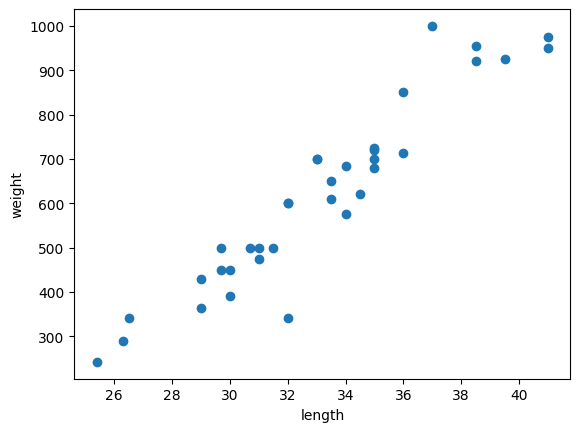

In [9]:
# 산점도 그리기
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [13]:
# smelt 데이터만 뽑고 변수로 만들기
df = pd.read_csv('data/Fish.csv')
smelt_df = df[df['Species'] == 'Smelt']

# smelt 에서 Length2 와 Weight 칼럼만 변수로 저장
smelt_length = smelt_df['Length2'].tolist()
smelt_weight = smelt_df['Weight'].tolist()

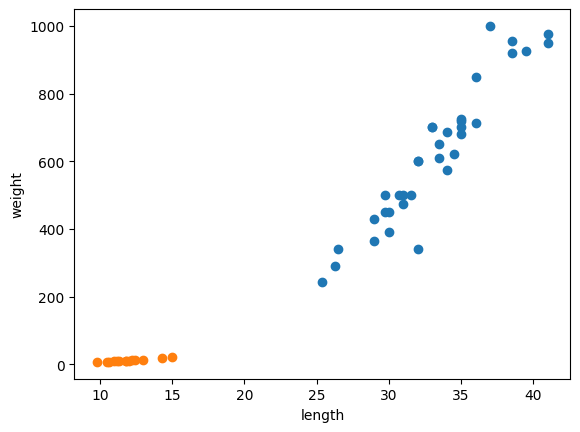

In [14]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [24]:
# scikit-learn
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

fish_data = [[l, w] for l, w in zip(length, weight)]
fish_data
# 첫번째 데이터는 1번 도미의 길이와 무게 입니다.
# zip(length, weight) 은 튜픕 형태임.
# scikit-learn은 리스트 형을 받고싶어하기 때문에 리스트로 마들기 위해 [l ,w] for 문 돌린거임
# 그런데 우리는 이런식의 불편한 작업을 하지 않을거임.
# 나중에 알려드림

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [38]:
# 타겟데이터(도미인지 빙어인지 데이터에 표시해주기)
target_data = [1] * len(bream_length) + [0] * len(smelt_length)

### k-최근접 이웃 알고리즘

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
kn = KNeighborsClassifier()

In [21]:
# 지도학습: 학습데이터와 정답데이터를 둘다 적용.
kn.fit(fish_data, target_data)

KNeighborsClassifier()

In [23]:
# 정답이 맞는지 확인(1 점이면 100점)
kn.score(fish_data, target_data)

1.0

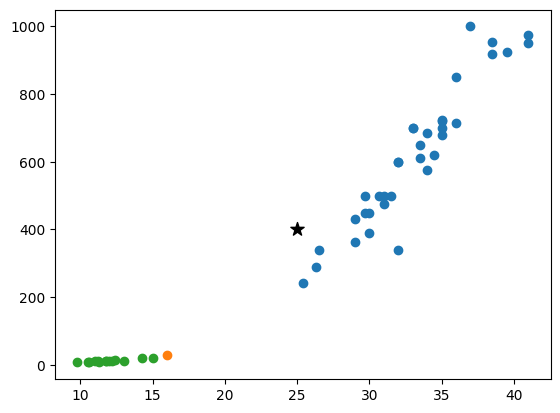

In [32]:
plt.scatter(bream_length, bream_weight)
plt.scatter(25, 400, c='black', s=100, marker="*")
# 하나의 데이터 추가
    # c='': 색
    # s=: 크기
    # marker='': 모양 바꿔줌
plt.scatter(16, 30)
plt.scatter(smelt_length, smelt_weight)
plt.show()

In [36]:
# 주가한 하나의 데이터는 어느 물고기인지 확인
kn.predict([[25, 400]])
# 도미는 1로 설정.
# 위 값은 도믿 데이터
# 판별은 나의 데이터와 가까운 데이터를 확인하여 판별

array([1])

In [34]:
kn.predict([[16, 30]])

array([0])

In [35]:
kn.predict([[20, 600]])

array([1])

In [41]:
# 훈련시킨 데이터
kn._fit_X

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [43]:
# 정답 데이터
kn._y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [45]:
# 최근접 이웃 알고리즘은 주변 데이터 5개를 비교함
# 5개 말고 더 많은 데이터로 비교해보기
# KNeighborsClassifier() n_neighbors 인자 수정
kn49 = KNeighborsClassifier(n_neighbors=49)

In [46]:
kn49.fit(fish_data, target_data)

KNeighborsClassifier(n_neighbors=49)

In [49]:
kn49.score(fish_data, target_data)
# 맞출 확률
# 근데 이 값은 35/49
# 모든 데이터를 비교하면 결국 상대적으로 많은 데이터에 가까워짐.
# 이것이 최근접 이웃 알고리즘 숫자 지정의 맹점

0.7142857142857143

In [52]:
# 이웃 데이터를 몇개를 해야 좋을지 확인하기
# for 문 확인하여 숫자를 몇으로 지정해야 좋은 점수가 나오는지 확인
kn = KNeighborsClassifier()
kn.fit(fish_data, target_data)

for n in range(5, 50):
    kn.n_neighbors = n
    score = kn.score(fish_data, target_data)
    print(n, score)
    if score < 1:
        break

# 18개의 데이터를 이웃으로 두는 순간 정답률이 떨어지고 for 문이 멈춤.
# 즉, 이웃 데이터가 많을수록 무조건 좋은건 아님.
# 최근접 이웃 알고리즘 내가 갖고 있는 데이터를 기준으로 평균치에 따라간다고생각.

5 1.0
6 1.0
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 0.9795918367346939


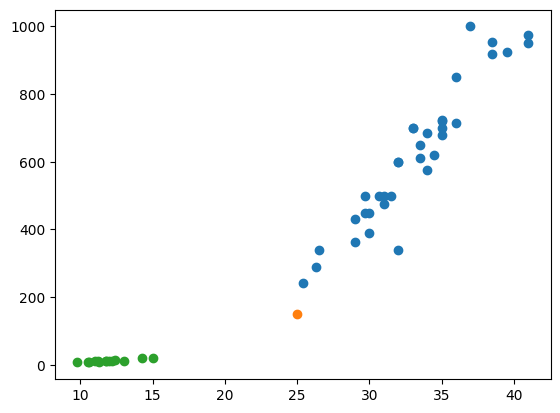

In [54]:
# 애매한 데이터 삽입 후 확인
# 컴퓨터는 length 데이터와 weight 데이터의 거리는 숫자만큼 떨어져 있는 것을 확인함
    # length 는 5단위, weight 는 200 단위
plt.scatter(bream_length, bream_weight)
plt.scatter(25, 150)
plt.scatter(smelt_length, smelt_weight)
plt.show()